In [10]:
import tensorflow as tf
import keras

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
from tqdm import tqdm
import os

In [12]:
RANDOM_STATE = 42  #setting the random variable value for reobataining the variable parameters

In [13]:
image_data_train = os.path.join('dataset/'+'eyes_only/train')  #defining the path where dataset is stored
image_data_test = os.path.join('dataset/'+'eyes_only/test')

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_gen = ImageDataGenerator(rescale=1/255,
                                zoom_range=0.2,
                                shear_range=0.4,
                                horizontal_flip=True,
                                rotation_range=40,
                                fill_mode='nearest',
                                brightness_range=[0.2,1])

test_gen = ImageDataGenerator(rescale=1/255)      #data augmentation

In [16]:
train_set = train_gen.flow_from_directory(image_data_train,
                                          target_size=(128,128),
                                          shuffle=True,
                                          batch_size=25,
                                          class_mode='binary')
test_set = test_gen.flow_from_directory(image_data_test,
                                        class_mode='binary',
                                        shuffle=False,
                                        target_size=(128,128),
                                        batch_size=15)   
# Date Preprocessing                                    

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [17]:
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout,Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.applications import VGG16,ResNet50V2,xception,inception_v3
from livelossplot import PlotLossesKeras
import pydot
from keras.utils.vis_utils import plot_model

In [18]:
def call_model():
    model_cnn = Sequential()
    model_cnn.add(Conv2D(64,(3,3),input_shape=(128,128,3),padding='same',activation='relu'))
    model_cnn.add(MaxPooling2D(pool_size=(3,3)))
    model_cnn.add(Conv2D(64,(3,3),activation='relu',padding='valid'))
    model_cnn.add(MaxPooling2D(pool_size=(2,2)))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Conv2D(32,(3,3),activation='relu',padding='valid'))
    model_cnn.add(MaxPooling2D(2,2))
    model_cnn.add(Conv2D(32,(3,3),activation='relu',padding='valid'))
    model_cnn.add(MaxPooling2D(2,2))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Flatten())

    model_cnn.add(Dense(512,activation='relu'))
    model_cnn.add(Dense(64,activation='relu'))
    model_cnn.add(Dense(1,activation='sigmoid'))


    model_cnn.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
    

    return model_cnn

    #defining a function that will return model (sequential) 

In [19]:
model = call_model()
#plot_model(model,to_file='model_cnn_1.png',show_shapes=True,show_layer_names=True)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 32)         

In [24]:
callback = [EarlyStopping(monitor='val_accuracy',
                            patience=4),
            PlotLossesKeras()] #defining certain monitoring libraries while the model is training 

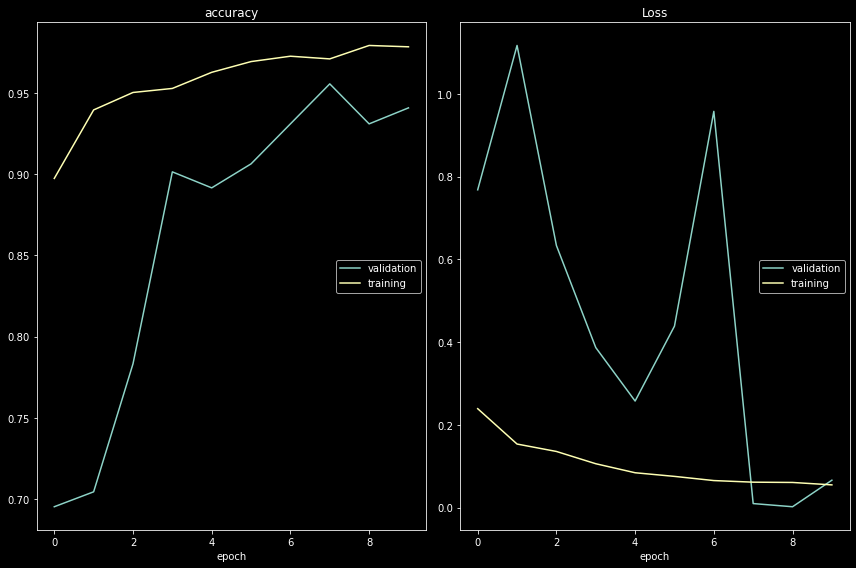

accuracy
	validation       	 (min:    0.695, max:    0.956, cur:    0.941)
	training         	 (min:    0.897, max:    0.979, cur:    0.978)
Loss
	validation       	 (min:    0.002, max:    1.117, cur:    0.066)
	training         	 (min:    0.055, max:    0.239, cur:    0.055)


In [25]:
h = model.fit(train_set,
              steps_per_epoch=train_set.n//25,
              epochs=10,
              validation_steps=test_set.n//15,
              validation_data=test_set,
              callbacks=callback)

In [27]:
train_set.class_indices

{'Closed': 0, 'Open': 1}

OPEN
OPEN
CLOSED
OPEN


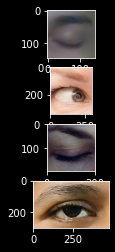

In [40]:
test_imagepath = os.path.join('dataset/'+'eyes_only/validation/')

for i in range(1,5):
    image = cv2.imread(test_imagepath+str(i)+'.jpg')
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,1,i)
    plt.imshow(image)
    image = cv2.resize(image,(128,128))
    image = image.reshape(1,128,128,3)
    prediction = model.predict(image)

    if prediction == 0:
        print('CLOSED')
    else:
        print('OPEN')


    #checking the model prediction against arbitrary input

In [26]:
#model.save('models/model_cnn_1.h5') #saving the trained model
model.save('models/model_cnn_2.h5') #saving the 2nd trained model